In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [111]:
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, load_digits
from sklearn.datasets import make_blobs, make_moons

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve

from sklearn.preprocessing import LabelEncoder    # 전처리에 필요한
from sklearn.preprocessing import OneHotEncoder   # 전처리에 필요한
from sklearn.preprocessing import StandardScaler   # 전처리에 필요한
from sklearn.preprocessing import MinMaxScaler   # 전처리에 필요한

from sklearn.tree import export_graphviz
import graphviz

In [3]:
import mglearn

# 1. 특징

+ 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
+ 설명하기 좋은 알고리즘
+ 과적합 문제
+ 균일도 측정 방식
    - entropy를 이용한 information Gain 지수(ID3 알고리즘)
    - gini 계수 : 0 (평등) -> 1 (불평등)
+ 전처리가 거의 필요없다. (표준화, 정규화)




# 2. 시각화

+ Graphviz
    - http://www.graphviz.org 에서 프로그램 다운로드 및 설치

+ ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH 에러가 나는 경우
    - 기존 설치한 것 uninstall
    - conda install python-graphviz 로 설치

    
+ pip install graphviz   또는 conda install python-graphviz

In [4]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz\bin"

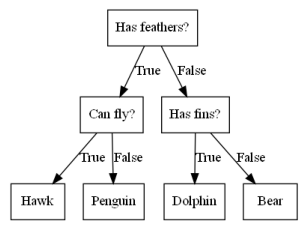

In [6]:
mglearn.plots.plot_animal_tree()

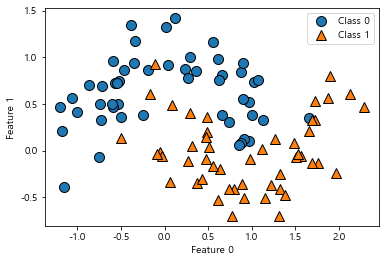

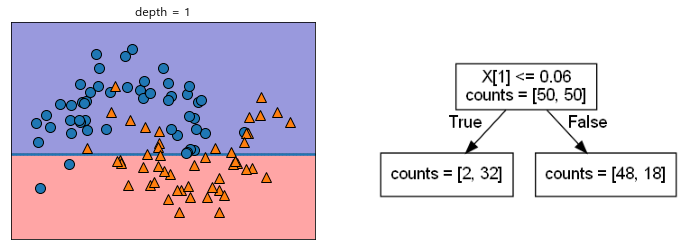

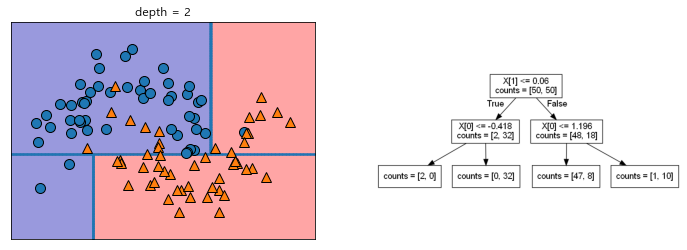

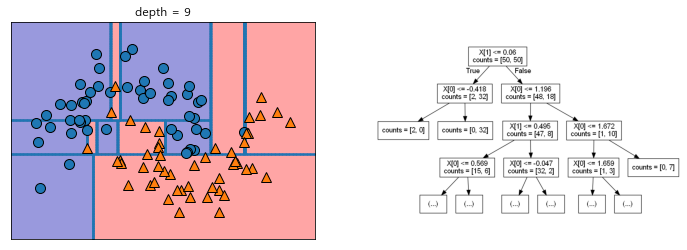

In [7]:
mglearn.plots.plot_tree_progressive()

In [10]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=0.2)

df_clf = DecisionTreeClassifier(random_state=155).fit(X_train, y_train)

In [17]:
export_graphviz(df_clf, out_file="data/tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

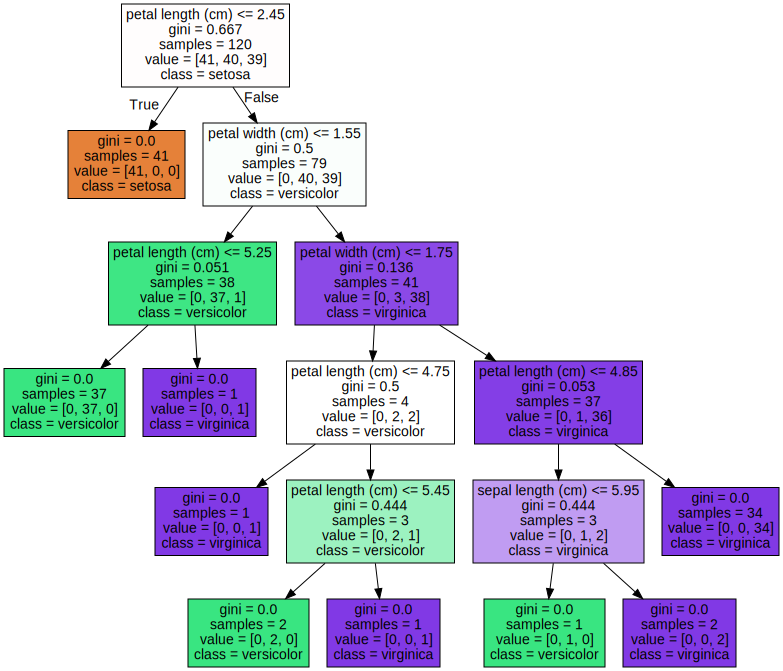

In [18]:
f = open("data/tree.dot")
graphviz.Source(f.read())

In [15]:
print("훈련 정확도 : ", df_clf.score(X_train, y_train))
print("테스트 정확도 : ", df_clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8666666666666667


In [16]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=0.2)

knn_clf = KNeighborsClassifier().fit(X_train, y_train)
print("훈련 정확도 : ", knn_clf.score(X_train, y_train))
print("테스트 정확도 : ", knn_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9666666666666667


In [19]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=0.2)

lr_clf = LogisticRegression().fit(X_train, y_train)
print("훈련 정확도 : ", lr_clf.score(X_train, y_train))
print("테스트 정확도 : ", lr_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


# 3. 과적합 해소를 위한 복잡도 제어

+ 가지치기(Prunning)
+ 종류
    - 사전 가지치기
    - 사후 가지치기
    - sklearn 에서는 사후 가지치기만 지원
+ 하이퍼 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_feature
    - max_depth
    - max_leaf_nodes

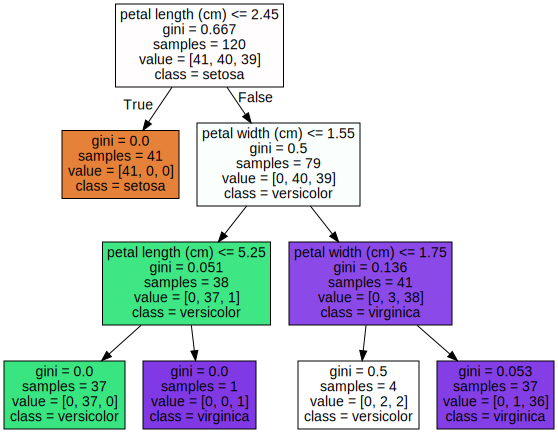

In [20]:
#### max_depth

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=0.2)

df_clf = DecisionTreeClassifier(random_state=155, max_depth=3).fit(X_train, y_train)

export_graphviz(df_clf, out_file="data/tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

In [21]:
print("훈련 정확도 : ", df_clf.score(X_train, y_train))
print("테스트 정확도 : ", df_clf.score(X_test, y_test))

훈련 정확도 :  0.975
테스트 정확도 :  0.9333333333333333


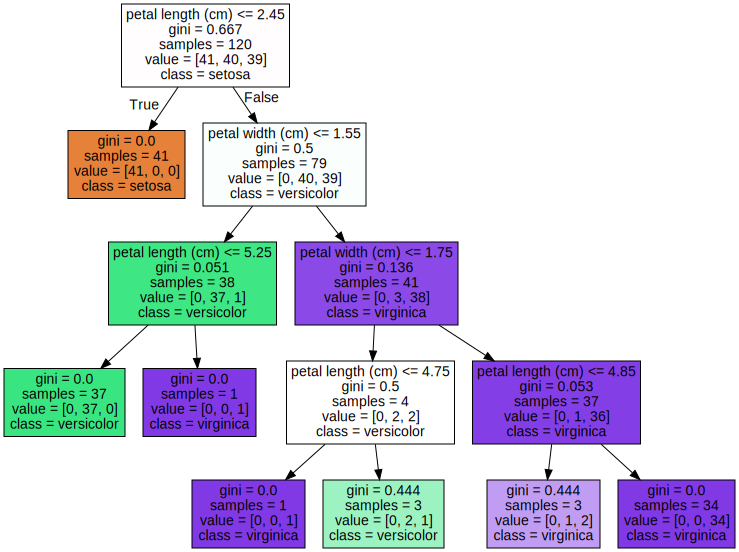

In [24]:
##### min_samples_split : 분할하기 위한 최소한의 샘플 수

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=0.2)

df_clf = DecisionTreeClassifier(random_state=155, min_samples_split=4).fit(X_train, y_train)

export_graphviz(df_clf, out_file="data/tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

In [25]:
print("훈련 정확도 : ", df_clf.score(X_train, y_train))
print("테스트 정확도 : ", df_clf.score(X_test, y_test))

훈련 정확도 :  0.9833333333333333
테스트 정확도 :  0.8666666666666667


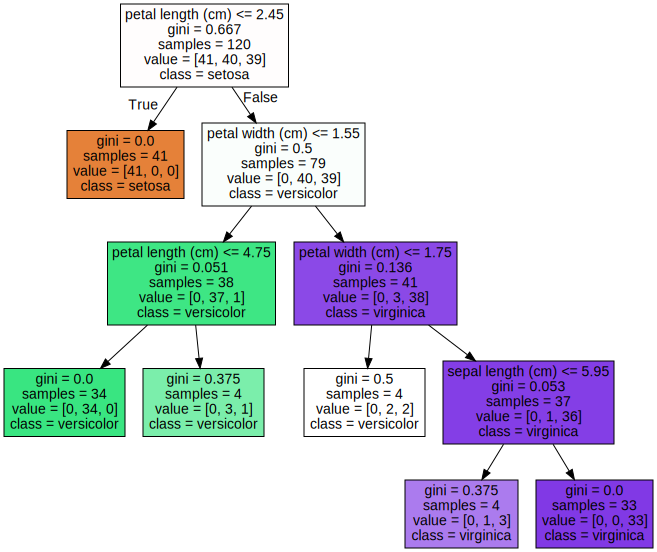

In [26]:
##### min_samples_leaf : 리프노드(단말노드 = 마지막노드 = 분할할 수 없는상태) 가 되기 위한 최소한의 샘플 수

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=0.2)

df_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(df_clf, out_file="data/tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

In [27]:
print("훈련 정확도 : ", df_clf.score(X_train, y_train))
print("테스트 정확도 : ", df_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


# 4. 성능 개선 : 특성 중요도

In [4]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=0.2)



In [5]:
df_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=155)

In [6]:
print("훈련 정확도 : ", df_clf.score(X_train, y_train))
print("테스트 정확도 : ", df_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


In [9]:
dir(df_clf)
print(df_clf.feature_importances_)    # 특성 중요도   petal length > petal width > sepal length > sepal width
print(iris.feature_names)   # 특성 이름

[0.00594727 0.         0.5459484  0.44810433]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<AxesSubplot:>

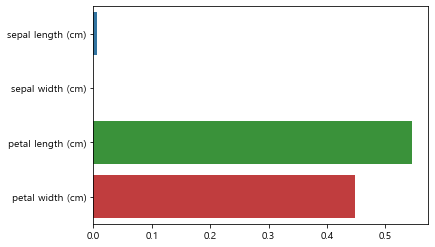

In [11]:
sns.barplot(x=df_clf.feature_importances_, y=iris.feature_names)    # 특성 중요도를 그래프화

+ 특성 중요도를 통해 추출한 특성만을 사용했을 때 성능 개선 효과

In [13]:
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

In [14]:
df_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=155)

In [15]:
print("훈련 정확도 : ", df_clf.score(X_train, y_train))
print("테스트 정확도 : ", df_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


## (1) 유방암 데이터셋 실습

In [16]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)

In [17]:
df_clf = DecisionTreeClassifier(random_state=155, max_depth=4)
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=155)

In [18]:
print("훈련 정확도 : ", df_clf.score(X_train, y_train))
print("테스트 정확도 : ", df_clf.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.9440559440559441


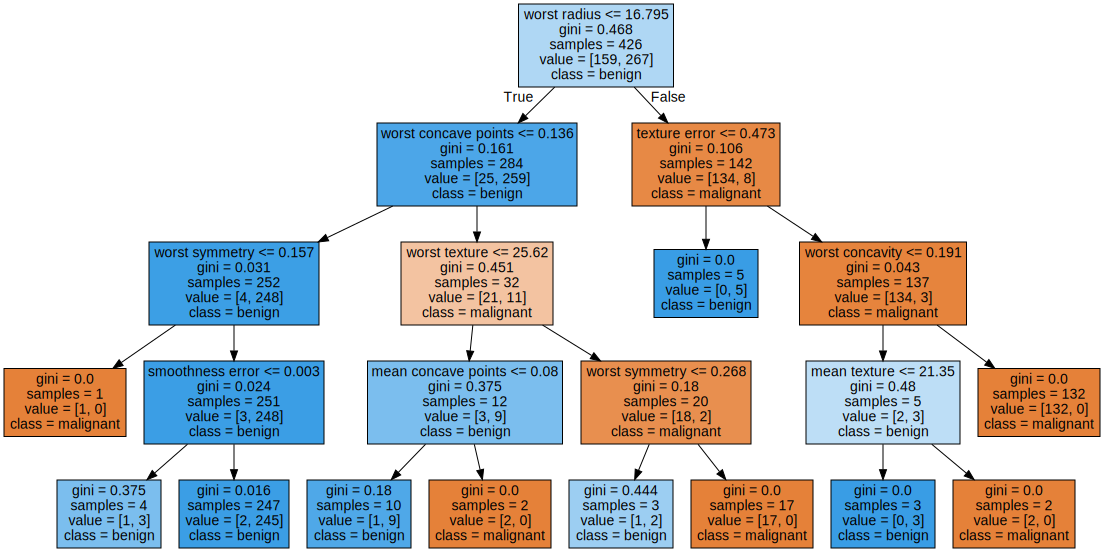

In [19]:
graph = export_graphviz(df_clf, out_file=None, class_names=cancer.target_names, feature_names=cancer.feature_names, filled=True)
# out_file 을 None으로하면 파일로 저장하지않고 잠깐 한정적으로 확인하고 끝날 수 있음

graphviz.Source(graph)

<AxesSubplot:>

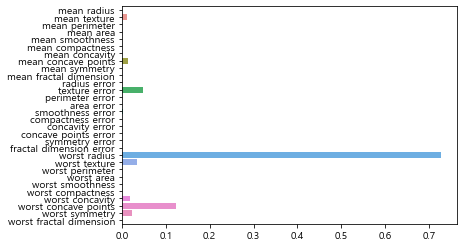

In [20]:
sns.barplot(x=df_clf.feature_importances_, y=cancer.feature_names)    # 특성 중요도를 그래프화

## (2) 서울지역 동 분류 실습

+ 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [21]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [22]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [23]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [24]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [26]:
print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64
Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64


C:\Users\alcls\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


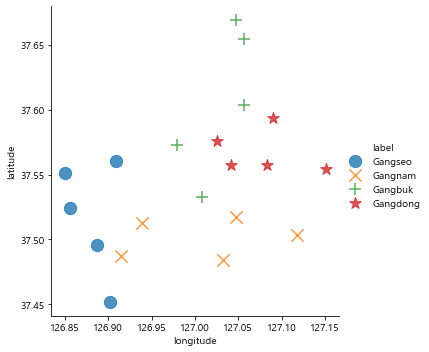

In [30]:
sns.lmplot("longitude", "latitude", data=train_df, fit_reg=False, hue="label", markers=["o", "x", "+", "*"], scatter_kws={"s":150})

#   hue="label" 는 색깔을 각각 다르게,  markers=["o", "x", "+", "*"] 는 모양을 변화, scatter_kws={"s":150} 는 사이즈를 150으로...

In [31]:
##### Machine Learning 을 위해 구이름과 동이름 삭제

train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

In [33]:
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [35]:
##### 학습데이터와 테스트 데이터 준비

X_train = train_df[["latitude", "longitude"]]
y_train = train_df["label"]

X_test = test_df[["latitude", "longitude"]]
y_test = test_df["label"]

In [37]:
##### Label값을 숫자로 변환
le = LabelEncoder()
y_enc = le.fit_transform(y_train)
y_enc

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [38]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_enc)

In [39]:
pred = clf.predict(X_test)
pred

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [41]:
print(accuracy_score(y_test.values, le.classes_[pred]))

1.0


# 5. RandomForest


### 앙상블(Ensemble)

+ Vote 방식
    - Soft Voting
    - Hard Voting

+ 종류
    - Voting
        - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
        - 같은 데이터셋에서 서로 다른 알고리즘을 가진 분류기를 결합
    
    - Bagging (Bootstrap Aggregating)
        - 서로 다른 샘플 데이터셋에서 각각의 분류기가 모두 같은 유형의 알고리즘 기반
        - RandomForest
    

In [44]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [45]:
knn = KNeighborsClassifier().fit(X_train, y_train)

print("훈련 정확도 : ", knn.score(X_train, y_train))
print("테스트 정확도 : ", knn.score(X_test, y_test))

훈련 정확도 :  0.9466666666666667
테스트 정확도 :  0.88


In [46]:
lr = LogisticRegression().fit(X_train, y_train)

print("훈련 정확도 : ", lr.score(X_train, y_train))
print("테스트 정확도 : ", lr.score(X_test, y_test))

훈련 정확도 :  0.8533333333333334
테스트 정확도 :  0.84


In [47]:
lc = LinearSVC().fit(X_train, y_train)

print("훈련 정확도 : ", lc.score(X_train, y_train))
print("테스트 정확도 : ", lc.score(X_test, y_test))

훈련 정확도 :  0.8666666666666667
테스트 정확도 :  0.8


In [53]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

print("훈련 정확도 : ", dt.score(X_train, y_train))
print("테스트 정확도 : ", dt.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.84


In [102]:
rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

print("훈련 정확도 : ", rf.score(X_train, y_train))
print("테스트 정확도 : ", rf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.88


### DecisionTree vs. RandomForest

In [103]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)

In [104]:
rf_clf = RandomForestClassifier(random_state=155, n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=155)

In [106]:
print("훈련 정확도 : ", rf_clf.score(X_train, y_train))
print("테스트 정확도 : ", rf_clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


<AxesSubplot:>

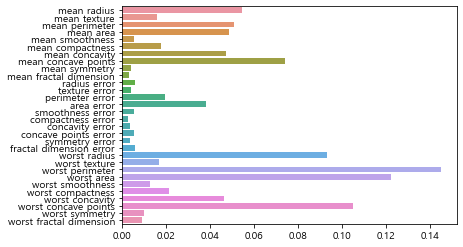

In [107]:
sns.barplot(x=rf_clf.feature_importances_, y=cancer.feature_names)

### 실습 : 손글씨 숫자데이터

In [110]:
mnist = load_digits()
print(mnist.data.shape)
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=42)

(1797, 64)


In [112]:
cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=10, scoring="accuracy").mean()

0.8359369817578772

In [115]:
cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10, scoring="accuracy").mean()

0.9695798783858484

In [117]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

In [119]:
#훈련데이터

print(dt.score(X_train, y_train))
print(rf.score(X_train, y_train))

1.0
1.0


In [120]:
#테스트데이터

print(dt.score(X_test, y_test))
print(rf.score(X_test, y_test))

0.8733333333333333
0.9755555555555555


### 실습 : 독버섯 데이터

+ https://archive.ics.uci.edu/ml/datasets/mushroom

In [125]:
mushroom = pd.read_csv("data/mushrooms.csv", header=None)
print(mushroom.shape)
mushroom.head()

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [126]:
# 결측치 확인
mushroom.isnull().sum()            # 결측치 없음

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [127]:
# 기초통계량 확인
mushroom.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [128]:
X = mushroom.drop(0, axis=1)
y = mushroom[0]

In [129]:
# 데이터를 숫자로 바꾸기

X_enc = LabelEncoder()

for i in X.columns:
    X[i] = X_enc.fit_transform(X[i])

In [130]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [131]:
y_enc = LabelEncoder()
y = y_enc.fit_transform(y)

In [132]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [135]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [136]:
pred = rf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [137]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
pred = dt.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [139]:
knn = KNeighborsClassifier().fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1040
           1       0.99      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [141]:
lr = LogisticRegression(max_iter=100000).fit(X_train, y_train)
pred = lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [142]:
ls = LinearSVC().fit(X_train, y_train)
pred = ls.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.94      0.94       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



C:\Users\alcls\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 실습 : 사용자 행동 인식 데이터셋

+ https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [150]:
feature_name_df = pd.read_csv("data/human_activity/features.txt", sep=" ", header=None, names=["column_index", "column_name"])
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [151]:
feature_name = list(feature_name_df["column_name"])

In [153]:
feature_dup_df = feature_name_df.groupby("column_name").count()
feature_dup_df[feature_dup_df["column_index"]>1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [164]:
new_feature_name_df = pd.DataFrame(data=feature_name_df.groupby("column_name").cumcount(), columns=["dup_cnt"])

new_feature_name_df = new_feature_name_df.reset_index()

new_feature_name_df = pd.merge(feature_name_df.reset_index(), new_feature_name_df, how="outer")

new_feature_name_df[new_feature_name_df["dup_cnt"]>0]

new_feature_name_df["column_name"] = \
    new_feature_name_df[["column_name", "dup_cnt"]].apply(lambda x : x[0] + "_" + str(x[1]) if x[1] > 0 else x[0], axis=1)

In [165]:
new_feature_name_df[new_feature_name_df["dup_cnt"]>0]

,index,column_index,column_name,dup_cnt
316,316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...,...
497,497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [176]:
feature_names = list(new_feature_name_df["column_name"])

In [177]:
X_train = pd.read_csv("data/human_activity/train/X_train.txt", sep="\s+", names=feature_names)
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [178]:
X_test = pd.read_csv("data/human_activity/test/X_test.txt", sep="\s+", names=feature_names)
X_test.head()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB


In [205]:
y_train = pd.read_csv("data/human_activity/train/y_train.txt", sep="\s+", header=None, names=["action"])

y_train

y_test = pd.read_csv("data/human_activity/test/y_test.txt", sep="\s+", header=None, names=["action"])

y_test

,action
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [206]:
y_train["action"].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [207]:
X_train.isnull().sum().sum()    # 결측치 0 으로 없음

0

#### (1) Decision Tree

In [208]:
dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))

1.0


In [209]:
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.8547675602307431


In [210]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

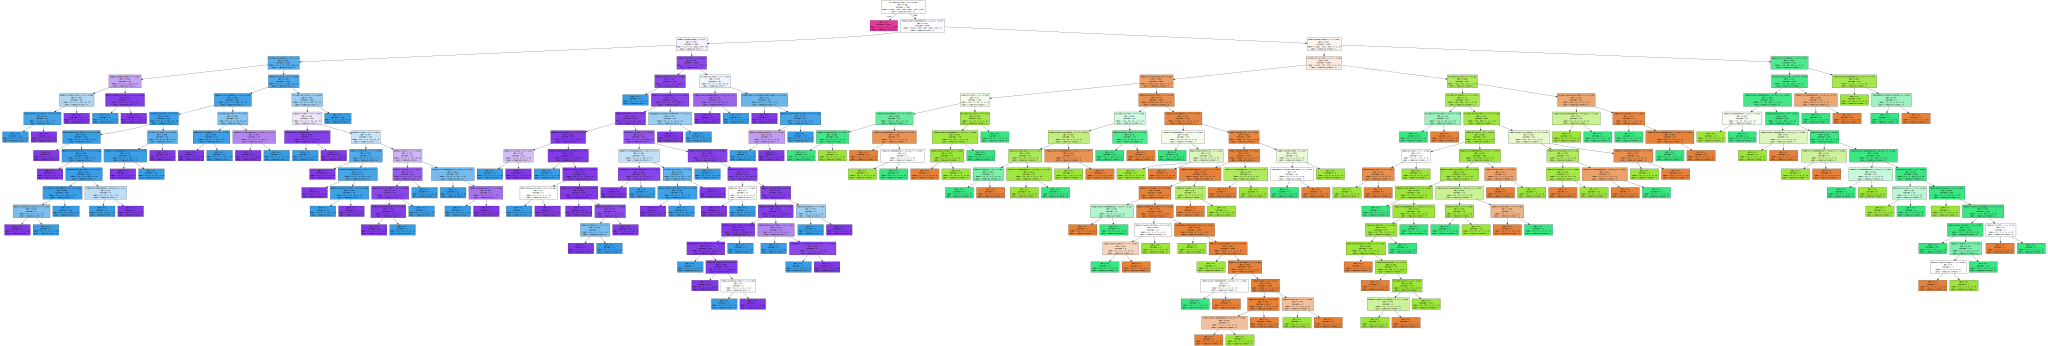

In [211]:
graph = export_graphviz(dt, out_file=None, class_names=feature_names, feature_names=feature_names, filled=True)

graphviz.Source(graph)

In [212]:
params = {"max_depth" : [5, 6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt, param_grid=params, cv=5, scoring="accuracy", verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [5, 6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [213]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8513444970102249
{'max_depth': 16}


In [214]:
pd.DataFrame(grid_cv.cv_results_)
pd.DataFrame(grid_cv.cv_results_)[["param_max_depth", "mean_test_score"]]

,param_max_depth,mean_test_score
0,5,0.848888
1,6,0.850791
2,8,0.851069
3,10,0.851209
4,12,0.844135
5,16,0.851344
6,20,0.850800
7,24,0.849440


In [215]:
pred = grid_cv.predict(X_test)
print(accuracy_score(y_test, pred))

0.8574821852731591


In [216]:
params = {"max_depth" : [5, 6, 8, 10, 12, 16, 20, 24], "min_samples_split":[16, 24]}

grid_cv = GridSearchCV(dt, param_grid=params, cv=5, scoring="accuracy", verbose=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [217]:
pred = grid_cv.predict(X_test)
print(accuracy_score(y_test, pred))

0.8717339667458432


<AxesSubplot:>

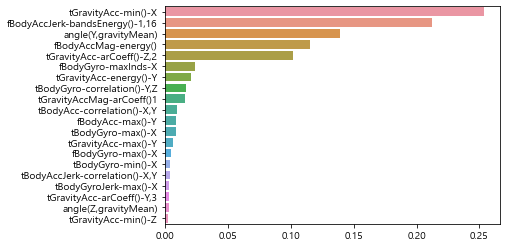

In [203]:
importances = grid_cv.best_estimator_.feature_importances_

important_series = pd.Series(importances, index=X_train.columns)
top20 = important_series.sort_values(ascending=False)[:20]

sns.barplot(x=top20, y=top20.index)